In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import os



In [2]:
def read_dat_file(file_path):
    """Reads a .dat file and returns the data as a numpy array."""
    return np.loadtxt(file_path)

# Read all the required .dat files
HI = read_dat_file('outHI.dat')
HQ = read_dat_file('outHQ.dat')
HU = read_dat_file('outHU.dat')
HV = read_dat_file('outHV.dat')

PI = read_dat_file('outPI.dat')
PQ = read_dat_file('outPQ.dat')
PU = read_dat_file('outPU.dat')
PV = read_dat_file('outPV.dat')

RI = read_dat_file('outRI.dat')
RQ = read_dat_file('outRQ.dat')
RU = read_dat_file('outRU.dat')
RV = read_dat_file('outRV.dat')

VI = read_dat_file('outVI.dat')
VQ = read_dat_file('outVQ.dat')
VU = read_dat_file('outVU.dat')
VV = read_dat_file('outVV.dat')



In [3]:
def mask_and_smooth(data):
    """Masks overflow and applies a Gaussian filter to reduce noise."""
    data[99, :] = np.nan  # Mask the 100th row
    data[:, 99] = np.nan  # Mask the 100th column
    smoothed_data = gaussian_filter(data, sigma=2)  # Apply Gaussian smoothing with higher sigma
    return smoothed_data

# Apply mask and smoothing to each data set
HI = mask_and_smooth(HI)
HQ = mask_and_smooth(HQ)
HU = mask_and_smooth(HU)
HV = mask_and_smooth(HV)

PI = mask_and_smooth(PI)
PQ = mask_and_smooth(PQ)
PU = mask_and_smooth(PU)
PV = mask_and_smooth(PV)

RI = mask_and_smooth(RI)
RQ = mask_and_smooth(RQ)
RU = mask_and_smooth(RU)
RV = mask_and_smooth(RV)

VI = mask_and_smooth(VI)
VQ = mask_and_smooth(VQ)
VU = mask_and_smooth(VU)
VV = mask_and_smooth(VV)


In [4]:
# Compute the matrix M using the provided formula
M11 = 0.5 * (HI + VI)
M12 = 0.5 * (HI - VI)
M13 = 0.5 * (2 * PI - (HI + VI))
M14 = 0.5 * (2 * RI - (HI + VI))

M21 = 0.5 * (HQ + VQ)
M22 = 0.5 * (HQ - VQ)
M23 = 0.5 * (2 * PQ - (HQ + VQ))
M24 = 0.5 * (2 * RQ - (HQ + VQ))

M31 = 0.5 * (HU + VU)
M32 = 0.5 * (HU - VU)
M33 = 0.5 * (2 * PU - (HU + VU))
M34 = 0.5 * (2 * RU - (HU + VU))

M41 = 0.5 * (HV + VV)
M42 = 0.5 * (HV - VV)
M43 = 0.5 * (2 * PV - (HV + VV))
M44 = 0.5 * (2 * RV - (HV + VV))

# Combine into a single matrix M for visualization
M = np.array([[M11, M12, M13, M14],
              [M21, M22, M23, M24],
              [M31, M32, M33, M34],
              [M41, M42, M43, M44]])



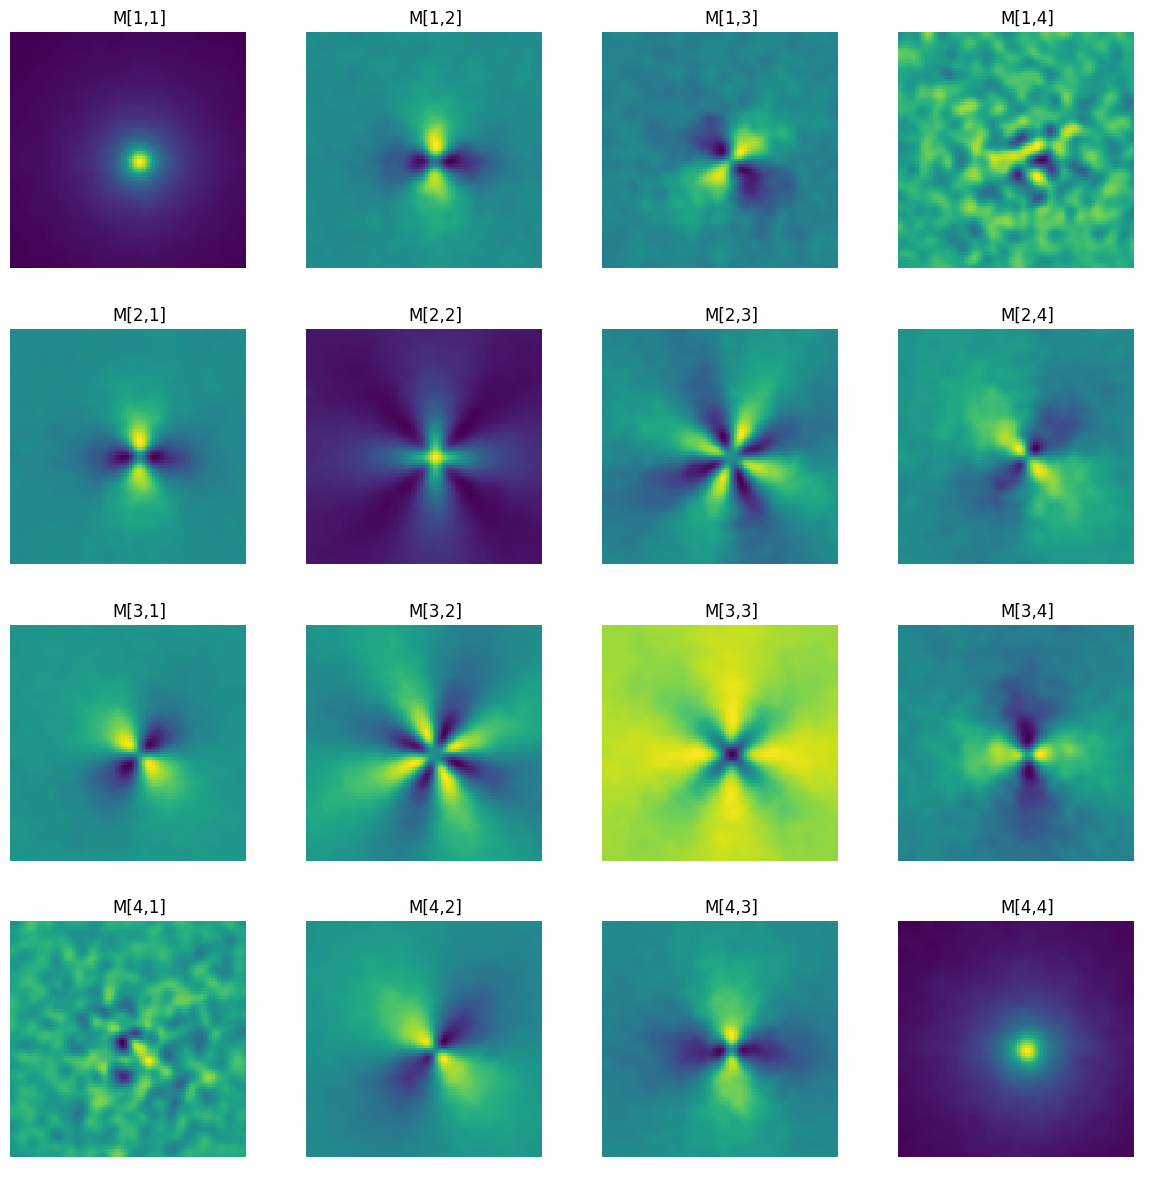

In [5]:
def visualize_and_save_matrix(M, folder_name='output_images'):
    """Visualizes the computed matrix M and saves the images in the specified folder."""
    # Create output directory if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    # Set the resolution for saving images
    dpi = 300  # High resolution
    
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    for i in range(4):
        for j in range(4):
            ax = axes[i, j]
            ax.imshow(M[i, j], cmap='viridis', interpolation='none')
            ax.set_title(f'M[{i+1},{j+1}]')
            ax.axis('off')
            
            # Save each subplot individually
            plt.figure()
            plt.imshow(M[i, j], cmap='viridis', interpolation='none')
            plt.title(f'M[{i+1},{j+1}]')
            plt.axis('off')
            plt.savefig(f'{folder_name}/M_{i+1}_{j+1}.png', dpi=dpi, bbox_inches='tight')
            plt.close()
    
    # Save the combined matrix image
    plt.tight_layout()
    plt.savefig(f'{folder_name}/matrix_overview.png', dpi=dpi, bbox_inches='tight')
    plt.show()

# Call the visualization and save function
visualize_and_save_matrix(M)



In [10]:
def extract_central_values(matrix_4x4):
    """Extract the central value from each 100x100 matrix in a 4x4 matrix of matrices."""
    central_values = np.zeros((4, 4))  # Initialize a 4x4 matrix for the central values
    for i in range(4):
        for j in range(4):
            central_values[i, j] = matrix_4x4[i, j][50, 50]  # Extract the central value
    return central_values

In [11]:
# Extract central values
central_matrix = extract_central_values(M)
print("SubMatrix_(50, 50):")
print(central_matrix)

SubMatrix_(50, 50):
[[116.23901609  -2.60017375   1.93833921  -1.15786753]
 [ -0.73133402  34.69278277   0.38926285   1.34883743]
 [  0.62003675  -0.57444182 -31.08382749   1.09298264]
 [  0.45162437   0.65520132   0.24368769  48.14969353]]
